In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
print (df["Ship Mode"].unique ())
print(df["Segment"].unique ())
print(df["Country"].unique())
print (df["Category" ].unique())
print (df["Sub-Category" ].unique())
print (df["Region" ].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


# statistical description of the data


In [36]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [14]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# sales analysis based on region

<Axes: xlabel='Region'>

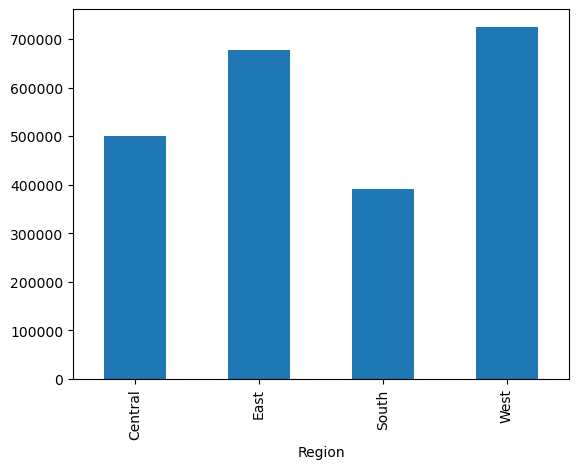

In [15]:
df.groupby("Region")["Sales"].sum().plot.bar()

<Axes: xlabel='Region'>

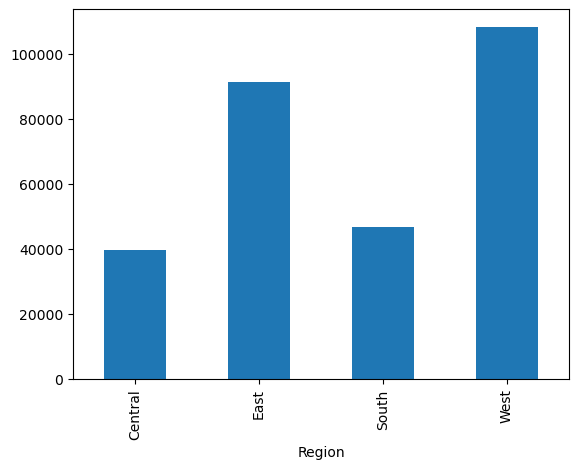

In [16]:
df.groupby("Region")["Profit"].sum().plot.bar()

<Axes: ylabel='Sales'>

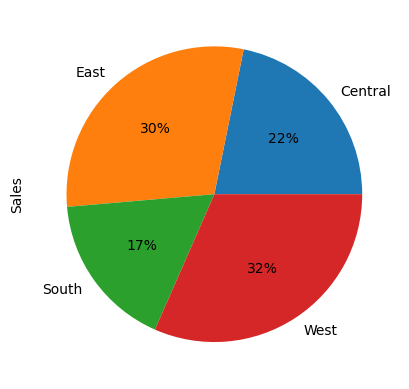

In [17]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

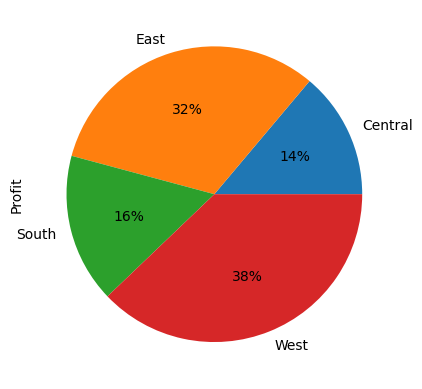

In [18]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: ylabel='Profit'>

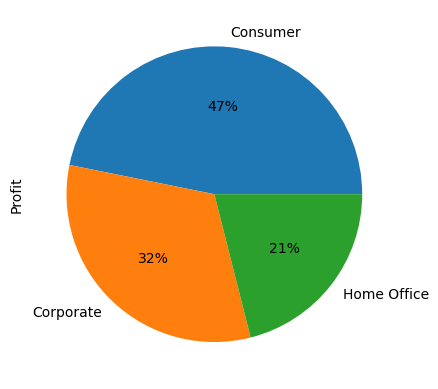

In [19]:
df.groupby("Segment")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<Axes: xlabel='State'>

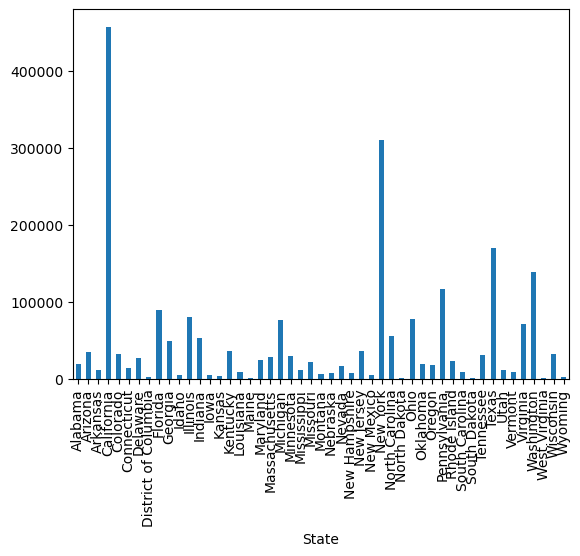

In [20]:
df.groupby("State")["Sales"].sum().plot.bar()

<Axes: xlabel='State'>

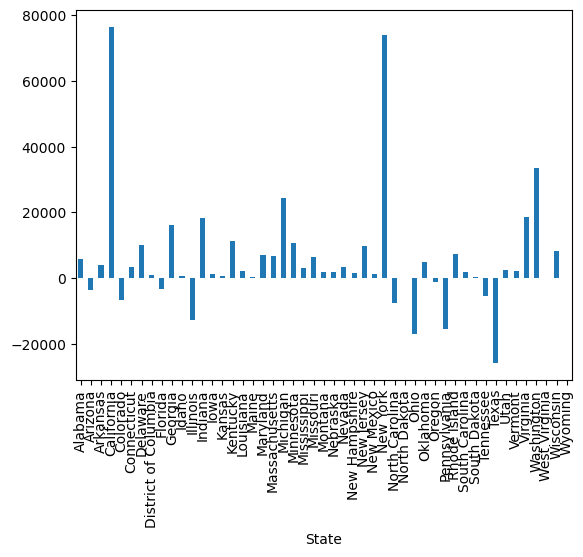

In [21]:
df.groupby("State")["Profit"].sum().plot.bar()

# CORRELATION


/var/folders/77/rfv1w_md4792ccf3t7k391h00000gp/T/ipykernel_17195/1651341200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


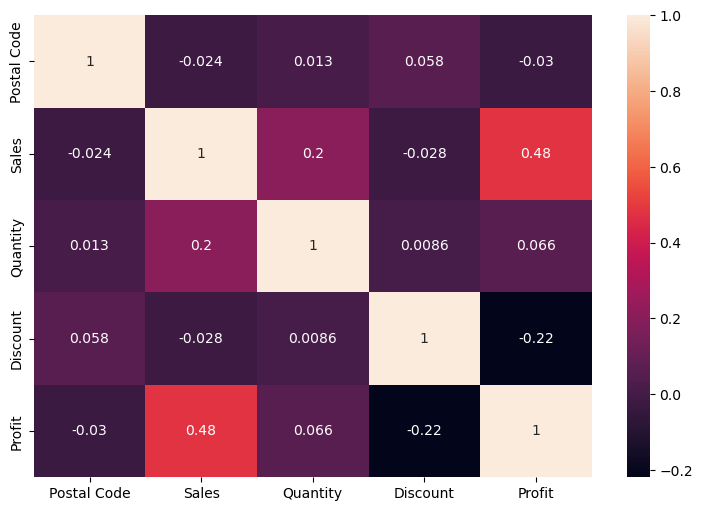

In [23]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

# line plot

In [31]:
plt.figure(figsize = (10,4))
sns.lineplot( 'Discount','Profit', df = df , color = 'r', label= 'Discount')
plt.legend()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x400 with 0 Axes>

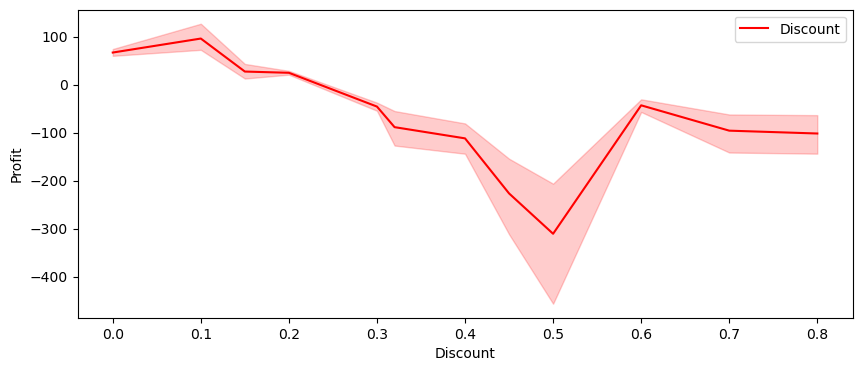

In [32]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Profit', data=df, color='r', label='Discount')
plt.legend()
plt.show()


<Axes: >

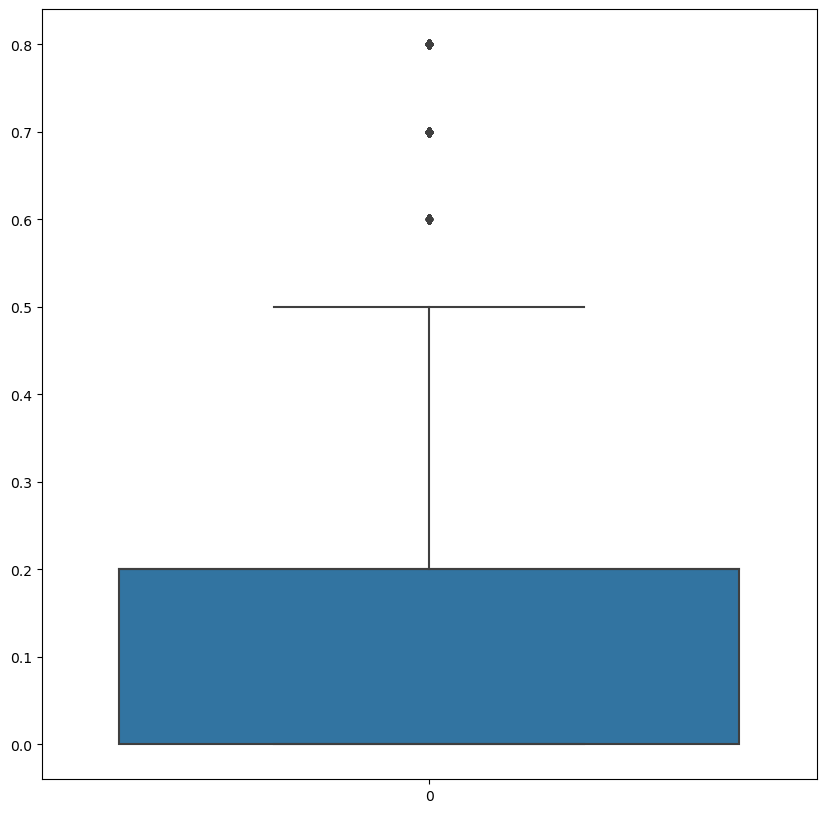

In [33]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(df['Discount'])

<Axes: >

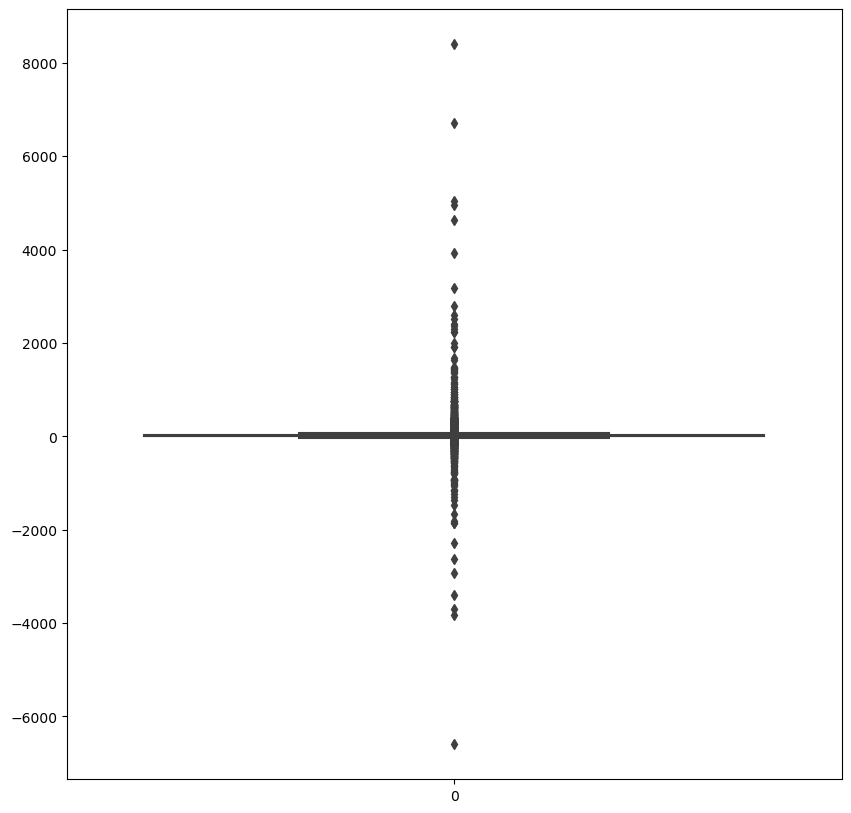

In [34]:
fig, axes = plt.subplots(figsize = (10 , 10))

sns.boxplot(df['Profit'])

# min max var


In [35]:
df.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# disturbution plot


count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


/var/folders/77/rfv1w_md4792ccf3t7k391h00000gp/T/ipykernel_17195/539594645.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});


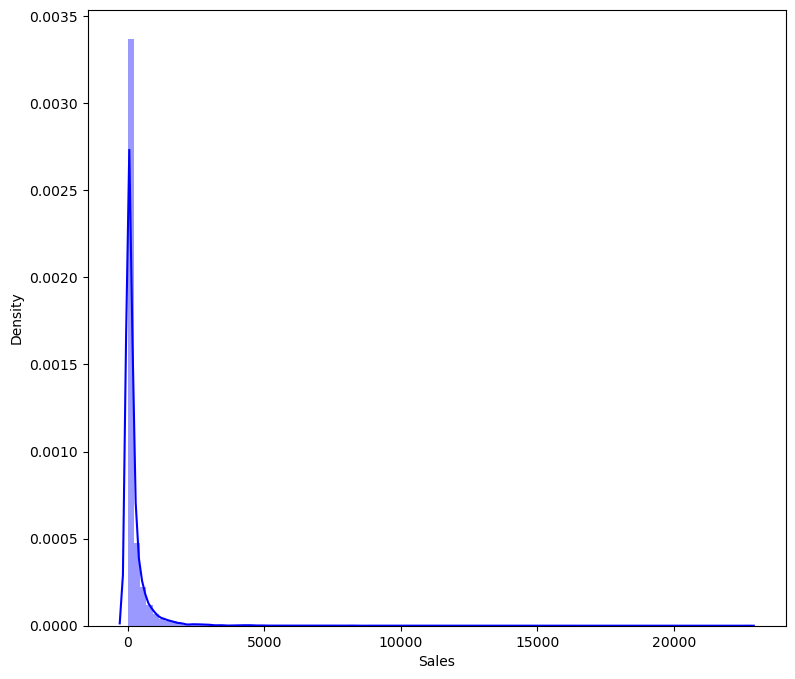

In [37]:
print(df['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(df['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});